In [22]:
import requests
import json
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import HourLocator, MonthLocator, YearLocator
import matplotlib.dates as mdates

In [10]:
def pullHistoricalPricesFromCMC(days = 180,ccyID = 1):
    dayInterval = 50
    intervals = int(days/dayInterval)+1
    timeNow = datetime.datetime.now()

    timeStampList = []
    closePriceList = []

    for i in range(intervals):
        
        timestampStart = int((timeNow - datetime.timedelta(days=(i+1)*dayInterval)).timestamp())
        timestampEnd   = int((timeNow - datetime.timedelta(days=i*dayInterval)).timestamp())

        garnishedURL = 'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id='+str(ccyID)+'&convert=USD&time_start='+str(timestampStart)+'&time_end='+str(timestampEnd)
        print(i, garnishedURL)
        r = requests.get(garnishedURL, cookies={"AWDALBCORS":str(random.random())})
        parsed = json.loads(r.content)
        for x in parsed['data']['quotes'][::-1]:
            timeStamp = x['time_close'].replace('T',' ').replace('Z',' ')
            closePrice = x['quote']['USD']['close'] 
            timeStampList.append(timeStamp)
            closePriceList.append(closePrice)

    ccySymbol = parsed['data']['symbol']
    ccyName   = parsed['data']['name']
            
    df = pd.DataFrame()
    df['timeStamp'] = timeStampList
    df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y%m%d %H:%M:%S.%f')
    df['ccyName'] = ccyName
    df['ccySymbol'] = ccySymbol
    df['closePrice'] = closePriceList

    print('DONE - ',parsed['data']['name'], parsed['data']['symbol'])
    return df

In [38]:
#dfETH = pullHistoricalPricesFromCMC(days = 180,ccyID = 1027)
dfBTC = pullHistoricalPricesFromCMC(days = 2750,ccyID = 1)

0 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1605774279&time_end=1610094279
1 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1601454279&time_end=1605774279
2 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1597134279&time_end=1601454279
3 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1592814279&time_end=1597134279
4 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1588494279&time_end=1592814279
5 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1584174279&time_end=1588494279
6 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start=1579854279&time_end=1584174279
7 https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&ti

In [41]:
dfBTC

,timeStamp,ccyName,ccySymbol,closePrice
0,2021-01-07 23:59:59.999,Bitcoin,BTC,39371.042353
1,2021-01-06 23:59:59.999,Bitcoin,BTC,36824.364410
2,2021-01-05 23:59:59.999,Bitcoin,BTC,33992.429344
3,2021-01-04 23:59:59.999,Bitcoin,BTC,31971.913522
4,2021-01-03 23:59:59.999,Bitcoin,BTC,32782.024466
...,...,...,...,...
2794,2013-05-15 23:59:59.999,Bitcoin,BTC,114.220001
2795,2013-05-14 23:59:59.999,Bitcoin,BTC,111.500000
2796,2013-05-13 23:59:59.999,Bitcoin,BTC,117.980003
2797,2013-05-12 23:59:59.999,Bitcoin,BTC,115.000000


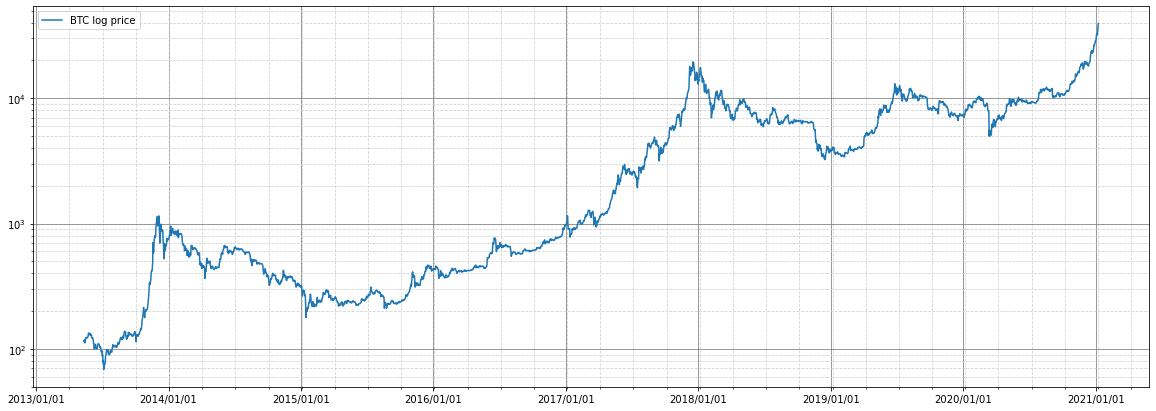

In [42]:
fig, axs = plt.subplots(1,figsize=(20,7))
axs.plot(dfBTC['timeStamp'],dfBTC['closePrice'],label='BTC log price')
axs.grid(b=True, which='major', color='grey', linestyle='-')
axs.minorticks_on()
axs.grid(b=True, which='minor', color='lightgrey', linestyle='--')
axs.set_yscale('log')
#axs.set_xlim([MAXDATE-datetime.timedelta(lastHours/24,0), MAXDATE])
axs.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d"))
axs.legend()

In [36]:
56*50

2800